## DS5559 - Project
## Notebook 12 - Naive Bayes
#### Name: Mengyao Zhang (mz6jv), Runhao Zhao (rz6dg)

## Synopsis
Use case: this notebook uses Naive Bayes for author classification

# Import Data

In [ ]:
# import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
db_file = 'project.db'
OHCO = ['book_num','chap_num', 'para_num', 'sent_num', 'token_num']
BOOKS = OHCO[:1] 
CHAPS = OHCO[:2]
PARAS = OHCO[:3]
SENTS = OHCO[:4]
#BAG = PARAS 
BAG = CHAPS
with sqlite3.connect(db_file) as db:
    bags_meta =  pd.read_sql("SELECT * FROM bag", db,index_col="bag_id")
    df = pd.read_sql("SELECT * FROM tfidf_small", db, index_col=BAG)

In [19]:
new_df = df.reset_index(level=0)

In [126]:
new_df2 = new_df.merge(bags_meta[["book_num","author"]].drop_duplicates(),how="left",on="book_num")


# Label Transformation

In [127]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(new_df2.author)


In [128]:
new_df2.drop(["book_num","author"],axis=1,inplace=True)

# Train test split

In [129]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test = train_test_split(new_df2,y,test_size=0.3,random_state=20)

In [130]:
x_test.head()

,95,150,162,296,382,415,417,420,447,461,...,44700,44804,44819,44825,44833,44857,44860,44864,44911,44929
557,0.000000,0.000000,0.000000,0.000000,0.000000,0.020181,0.000000,0.000000,0.0,0.000000,...,0.032637,0.025941,0.031345,0.016868,0.007051,0.012071,0.033787,0.025411,0.000000,0.000000
1374,0.017568,0.000000,0.000000,0.019081,0.011228,0.035801,0.000000,0.000000,0.0,0.019258,...,0.000000,0.000000,0.000000,0.000000,0.016678,0.007138,0.000000,0.036063,0.012907,0.013655
1452,0.000000,0.040813,0.000000,0.000000,0.000000,0.000000,0.038452,0.000000,0.0,0.000000,...,0.082915,0.000000,0.000000,0.000000,0.026870,0.000000,0.000000,0.019367,0.000000,0.000000
379,0.045269,0.065276,0.068641,0.000000,0.057865,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030975,0.000000,0.000000
530,0.019731,0.028452,0.029919,0.021430,0.000000,0.000000,0.000000,0.029463,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.056195,0.016033,0.000000,0.027002,0.057983,0.000000


# Naive bayes 

In [131]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train,y_train)
pred = nb.predict(x_test)

# Confusion Matrix

In [132]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred,labels=list(set(y_test)))


array([[  0,   9,   6,   0,   0,   0,   0,   1,   1],
       [  0, 107,   0,   0,   0,   0,   0,   0,   0],
       [  0,   2,  78,   0,   0,   0,   0,   0,   0],
       [  0,   4,   5,  34,   0,   0,   0,   3,   0],
       [  0,  10,  10,   0,  12,   0,   0,   5,   0],
       [  0,   0,   8,   0,   0,   0,   0,   1,   0],
       [  0,   1,   1,   0,   0,   0,  20,   0,   9],
       [  0,  10,   3,   1,   0,   0,   0,  41,   0],
       [  0,   1,   0,   0,   0,   0,   0,   0,  95]])

In [133]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[  0   9   6   0   0   0   0   1   1]
 [  0 107   0   0   0   0   0   0   0]
 [  0   2  78   0   0   0   0   0   0]
 [  0   4   5  34   0   0   0   3   0]
 [  0  10  10   0  12   0   0   5   0]
 [  0   0   8   0   0   0   0   1   0]
 [  0   1   1   0   0   0  20   0   9]
 [  0  10   3   1   0   0   0  41   0]
 [  0   1   0   0   0   0   0   0  95]]


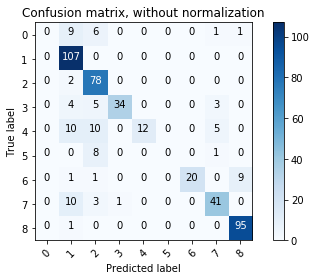

In [134]:
cnf_matrix = confusion_matrix(y_test, pred,labels=list(set(y_test)))
np.set_printoptions(precision=2)
import itertools
# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=list(set(y_test)),
                      title='Confusion matrix, without normalization')